In [1]:
import sympy as sp
from sympy import sin, cos, tan
import numpy as np
import matplotlib.pyplot as plt

# https://docs.sympy.org/latest/index.html

sp.init_printing() 

In [2]:
#initialize symbols and time functions
t, x_0, y_0, v_0, Theta, g, m =sp.symbols(r't x_0 y_0 v_0 \Theta g m', real=True) 
t, v_0, g, m =sp.symbols(r't v_0 g m', positive=True) 
g_vector=sp.Matrix([[0],[-g]])
x, y =sp.symbols(r'x y', cls=sp.Function)
x, y= x(t), y(t)
#x =sp.Function('x')(t)
#y =sp.Function('y')(t)

""" x_dot = sp.Derivative(x,t)
x_ddot = x_dot.diff(t)
y_dot = sp.Derivative(y,t)
y_ddot = y_dot.diff(t) """

position = sp.Matrix([[x],[y]])
velocity = position.diff(t)
acceleration = velocity.diff(t)
motion_eqt = sp.Eq(m*acceleration,m*g_vector)
motion_eqt


⎡    2      ⎤         
⎢   d       ⎥         
⎢m⋅───(x(t))⎥         
⎢    2      ⎥         
⎢  dt       ⎥   ⎡ 0  ⎤
⎢           ⎥ = ⎢    ⎥
⎢    2      ⎥   ⎣-g⋅m⎦
⎢   d       ⎥         
⎢m⋅───(y(t))⎥         
⎢    2      ⎥         
⎣  dt       ⎦         

In [3]:
ode = m*acceleration-m*g_vector
ode_flattened = ode.T.tolist()[0]
initial_conditions={x.subs(t,0): x_0, 
                    x.diff(t).subs(t, 0): v_0 * sp.cos(Theta),
                    y.subs(t,0): y_0, 
                    y.diff(t).subs(t, 0): v_0 * sp.sin(Theta),
                    }
x_sol_eq, y_sol_eq = sp.dsolve(ode_flattened,[x,y],ics=initial_conditions)
x_sol, y_sol = x_sol_eq.rhs, y_sol_eq.rhs

x_sol, y_sol, x_sol_eq, y_sol_eq

In [4]:
# numeric functions
numeric_x_sol = sp.lambdify((t, x_0, y_0, v_0, Theta, g, m), x_sol)
numeric_y_sol = sp.lambdify((t, x_0, y_0, v_0, Theta, g, m), y_sol)
numeric_vx_sol = sp.lambdify((t, x_0, y_0, v_0, Theta, g, m), x_sol.diff(t))
numeric_vy_sol = sp.lambdify((t, x_0, y_0, v_0, Theta, g, m), y_sol.diff(t))


In [5]:
#plot trajectory 
Nbr_points=100
time_line = np.linspace(0,1,Nbr_points)
num_x = numeric_x_sol(time_line, 0, 5, 8, np.pi/4, 10, 0.5)
num_y = numeric_y_sol(time_line, 0, 5, 8, np.pi/4, 10, 0.5)
# vector field
num_vx = numeric_vx_sol(time_line, 0, 5, 8, np.pi/4, 10, 0.5)
num_vy = numeric_vy_sol(time_line, 0, 5, 8, np.pi/4, 10, 0.5)

Text(0.5, 0.01, 't(s)')

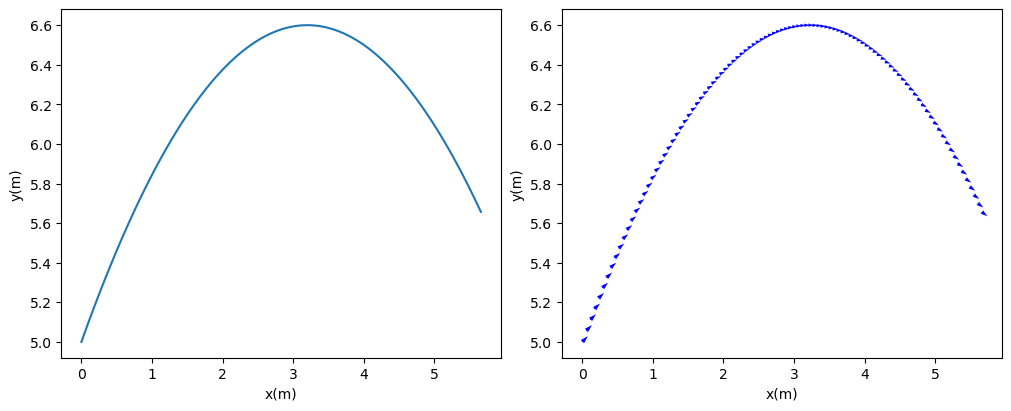

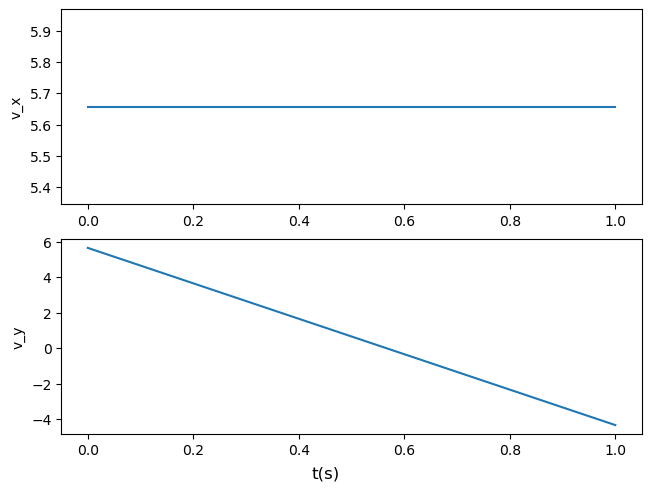

In [6]:

fig_t, ax_t = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(10, 4))
ax_t[0].plot(num_x,num_y)
ax_t[0].set_xlabel("x(m)")
ax_t[0].set_ylabel("y(m)")
ax_t[1].quiver(num_x,num_y,num_vx, num_vy, units='dots', scale=1, color='b')
plt.xlabel("x(m)")
ax_t[1].set_ylabel("y(m)")

fig, ax = plt.subplots(nrows=2, ncols=1, constrained_layout=True)
ax[0].plot(time_line, [num_vx]*Nbr_points)
ax[0].set_ylabel("v_x")
ax[1].plot(time_line,num_vy)
ax[1].set_ylabel("v_y")

# common axis labels
fig.supxlabel("t(s)")

In [7]:
# y = y(x) 
x_x, y_y = sp.symbols('x_x y_y')
""" y_y = sp.symbols('y_y', cls=sp.Function)
y_y=y_y(x_x) """
x_as_a_symbol_eq = x_sol_eq.subs(x,x_x)
tx_sol = sp.solve(x_as_a_symbol_eq,t)[0]
y_as_a_symbol_eq = y_sol_eq.subs(y,y_y)
y_x_sol = y_as_a_symbol_eq.subs(t,tx_sol)
y_x_sol=sp.trigsimp(y_x_sol)
sp.pprint(y_x_sol)
print()

# find vertex
y_dot_prime = y_x_sol.rhs.diff(x_x)
x_heighest = sp.solve(sp.Eq(y_dot_prime,0),x_x)[0]
y_heighest = y_x_sol.rhs.subs(x_x,x_heighest)
sp.pprint(sp.simplify(y_heighest))
print()

# aalways worke with simplified equations otherwise the results might be wrong
Theta_highest=sp.solve(sp.Eq(sp.simplify(y_heighest.diff(Theta)),0),Theta)
print(Theta_highest)
print()

# numeric
numeric_y_x = sp.lambdify((x_x, x_0, y_0, v_0, Theta, g, m), y_x_sol)


                      2                                 
          g⋅(-x₀ + xₓ)                                  
y_y = - ────────────────── + y₀ + (-x₀ + xₓ)⋅tan(\Theta)
            2    2                                      
        2⋅v₀ ⋅cos (\Theta)                              

       2    2        
     v₀ ⋅sin (\Theta)
y₀ + ────────────────
           2⋅g       

[0, pi/2]



In [8]:
distance = sp.simplify(sp.solve(y_x_sol.subs(y_y,0),x_x)[1]-x_0)
sp.pprint(distance)
print()
distance_00 = distance.subs([(x_0,0), (y_0,0)])
Theta_highest=sp.solve(sp.Eq(sp.simplify(distance.diff(Theta)),0),Theta)
print(Theta_highest)
print()
distance_00_no_ABS= v_0*(v_0*sin(Theta) + v_0*sin(Theta))*cos(Theta)/g
sp.pprint(sp.simplify(distance_00_no_ABS))
print()
Theta_highest_00=sp.solve(sp.Eq(sp.simplify(distance_00_no_ABS.diff(Theta)),0),Theta)
sp.pprint(Theta_highest_00)


   ⎛                    ___________________________⎞            
   ⎜                   ╱            2    2         ⎟            
v₀⋅⎝v₀⋅sin(\Theta) + ╲╱  2⋅g⋅y₀ + v₀ ⋅sin (\Theta) ⎠⋅cos(\Theta)
────────────────────────────────────────────────────────────────
                               g                                

[-2*atan(sqrt(4*g*y_0 + 3*v_0**2 - 2*sqrt(2)*sqrt((g*y_0 + v_0**2)*(2*g*y_0 + v_0**2)))/v_0), 2*atan(sqrt(4*g*y_0 + 3*v_0**2 - 2*sqrt(2)*sqrt((g*y_0 + v_0**2)*(2*g*y_0 + v_0**2)))/v_0), -2*atan(sqrt(4*g*y_0 + 3*v_0**2 + 2*sqrt(2)*sqrt((g*y_0 + v_0**2)*(2*g*y_0 + v_0**2)))/v_0), 2*atan(sqrt(4*g*y_0 + 3*v_0**2 + 2*sqrt(2)*sqrt((g*y_0 + v_0**2)*(2*g*y_0 + v_0**2)))/v_0)]

  2              
v₀ ⋅sin(2⋅\Theta)
─────────────────
        g        

⎡π  3⋅π⎤
⎢─, ───⎥
⎣4   4 ⎦


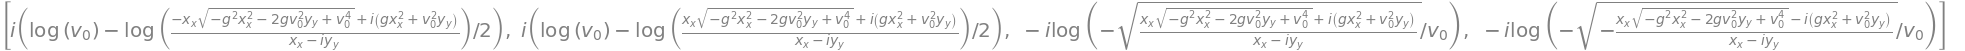

In [9]:
# I tried every possible built in simplification but the 
# variable changes are not done optimally: numerically equivalent but the expression is not the same
solutions_Theta = sp.solve(y_x_sol.subs([(x_0,0), (y_0,0)]),Theta)
solutions_Theta

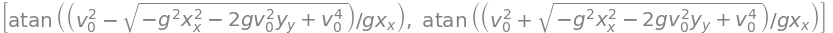

In [10]:
u=sp.symbols('u')
u_equation=y_x_sol.subs([(x_0,0), (y_0,0), (Theta, sp.atan(u))])
solutions_u = sp.solve(u_equation.subs([(x_0,0), (y_0,0)]),u)
solutions_Theta_u = [sp.atan(solutions_u[i]) for i in [0,1]]
solutions_Theta_u